# TP4 - Leitura dados e uso de bibliotecas

Bem vindo!
Neste TP você implementará um modelo num problema de regressão, usando bibliotecas prontas.

**Objetivos**
- Aplicar uma rede neural multicamadas num problema real com dados medidos

## O Jupyter notebook

O Jupyter Notebook é um ambiente interativo de programação em uma página web. Nesse notebook você colocará o código entre os comentários `### SEU CÓDIGO COMEÇA AQUI ###` e `### FIM DO CÓDIGO ###`. Após escrever o código, você pode executar a célula com `Shift+Enter` ou no botão "Run" (com símbolo de "play") na barra de comandos acima.

Em alguns trechos será especificado "(≈ X linhas de código)" nos comentários para que você tenha uma ideia sobre o tamanho do código a ser desenvolvido naquele trecho. Lembrando que é só uma estimativa, o seu código pode ficar maior ou menor do que o especificado.

**Alguns atalhos úteis *no código*:**
- `Ctrl+Enter`: executa a célula e mantém o cursor na mesma célula
- `Shift+Enter`: executa a célula e move o cursor para a próxima célula
- `Ctrl+/`: comenta a linha de código
- `Shift+Tab`: quando o cursor estiver em uma função, mostra um HELP da função

**Alguns atalhos úteis *na célula*:**
- Cria nova célula `a`: acima, `b`: abaixo da céula selecionada
- `d` (2x): deleta célula selecionada
- `m`: define célula como texto (Markdown)
- `y`: define célula como código (Python)
- `l`: mostra numeração das linhas na célula de código
- `c`: copiar, `v`: colar, `x`: recortar célula selecionada
- `ctrl+shift+p`: mostra busca para todos comandos de célula

In [1]:
# Importa bibliotecas
import numpy as np, matplotlib.pyplot as plt
import pandas as pd, seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
%matplotlib inline
keras.__version__

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.3.1'

## Leitura dos dados

Nessa seção, você deve estar na mesma pasta dos dados "Communities and Crime Data Set", disponível em https://archive.ics.uci.edu/ml/datasets/wine+quality. Arquivos:

- `winequality.names`
- `winequality-red.csv`
- `winequality-white.csv`

O código abaixo importa os dados dos arquivos acima.

In [2]:
# faz leitura dos arquivos .csv
tinto = pd.read_csv('winequality-red.csv', low_memory=False, sep=';')
branco = pd.read_csv('winequality-white.csv', low_memory=False, sep=';')
# apresenta algumas métricas sobre os dados
tinto.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
# apresenta primeiros valores dos dados
tinto.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# # Código para visualização dos dados
# # Boxplot
# tinto.plot.box(vert=False);
# # Matriz de pontos
# pd.plotting.scatter_matrix(tinto, figsize=(15,15));

In [5]:
# parâmetros para coleta dos dados
tr_perc = .8 # percentual de dados para treinamento

# Lê quantidade de dados totais e de treinamento
Ntot, nx = tinto.iloc[:,:-1].shape #qtd total amostras, qtd entradas
N = int(Ntot*.8) #qtd dados treinamento

# calcula parâmetros de normalização: média e variância
normaliza = StandardScaler() #inicia
normaliza.fit(tinto.iloc[:,:-1]) #usa TODOS os dados (train e valid)

# embaralha amostras
dadosEmb = shuffle(tinto) #função da biblioteca 'sklearn.utils'

# Atribui dados em X e Y (treinamento)
X = dadosEmb.iloc[:N,:-1].values #[amostras, features]
X = normaliza.transform(X) #normaliza dados
Y = dadosEmb.iloc[:N,-1].values #[amostras, features]

# Normaliza dados de treinamento!
# X, Xnorms = normalize(X, axis=0, return_norm=True)

# Atribui dados em X e Y (validação)
X_val = dadosEmb.iloc[N:,:-1].values #[amostras, features]
X_val = normaliza.transform(X_val) #normaliza dados
Y_val = dadosEmb.iloc[N:,-1].values #[amostras, features]

___
## Modelo neural e treinamento

In [ ]:
# Inicializa modelo da rede neural
rede = Sequential()

### IMPLEMENTE AQUI A REDE NEURAL ###

# use essas métricas! ['accuracy', 'mse']
rede.compile(metrics=['accuracy', 'mse'])
rede.summary()

In [7]:
# treina modelo!
EPOCAS = 1

### IMPLEMENTE AQUI O TREINAMENTO DA REDE NEURAL ###
treinamento = rede.fit(X, Y, epochs=EPOCAS);


Train on 1023 samples, validate on 256 samples
Epoch 1/5000
1023/1023 [==============================] - 0s 173us/step - loss: 31.3964 - accuracy: 0.0000e+00 - mse: 31.3964 - val_loss: 31.8307 - val_accuracy: 0.0000e+00 - val_mse: 31.8307
Epoch 2/5000
1023/1023 [==============================] - 0s 13us/step - loss: 30.4493 - accuracy: 0.0000e+00 - mse: 30.4493 - val_loss: 30.6847 - val_accuracy: 0.0000e+00 - val_mse: 30.6847
Epoch 3/5000
1023/1023 [==============================] - 0s 10us/step - loss: 29.1453 - accuracy: 0.0000e+00 - mse: 29.1453 - val_loss: 29.2954 - val_accuracy: 0.0000e+00 - val_mse: 29.2954
Epoch 4/5000
1023/1023 [==============================] - 0s 11us/step - loss: 27.6072 - accuracy: 0.0000e+00 - mse: 27.6072 - val_loss: 27.5952 - val_accuracy: 0.0000e+00 - val_mse: 27.5952
Epoch 5/5000
1023/1023 [==============================] - 0s 11us/step - loss: 25.7197 - accuracy: 0.0000e+00 - mse: 25.7197 - val_loss: 25.6328 - val_accuracy: 0.0039 - val_mse: 25.6328
E

Epoch 46/5000
1023/1023 [==============================] - 0s 14us/step - loss: 1.7013 - accuracy: 0.2845 - mse: 1.7013 - val_loss: 1.8238 - val_accuracy: 0.2969 - val_mse: 1.8238
Epoch 47/5000
1023/1023 [==============================] - 0s 15us/step - loss: 1.6768 - accuracy: 0.2864 - mse: 1.6768 - val_loss: 1.8001 - val_accuracy: 0.3008 - val_mse: 1.8001
Epoch 48/5000
1023/1023 [==============================] - 0s 14us/step - loss: 1.6528 - accuracy: 0.2874 - mse: 1.6528 - val_loss: 1.7789 - val_accuracy: 0.3008 - val_mse: 1.7789
Epoch 49/5000
1023/1023 [==============================] - 0s 12us/step - loss: 1.6295 - accuracy: 0.2893 - mse: 1.6295 - val_loss: 1.7563 - val_accuracy: 0.3086 - val_mse: 1.7563
Epoch 50/5000
1023/1023 [==============================] - 0s 18us/step - loss: 1.6079 - accuracy: 0.2933 - mse: 1.6079 - val_loss: 1.7327 - val_accuracy: 0.3086 - val_mse: 1.7327
Epoch 51/5000
1023/1023 [==============================] - 0s 14us/step - loss: 1.5850 - accuracy: 0

1023/1023 [==============================] - 0s 13us/step - loss: 0.7021 - accuracy: 0.4682 - mse: 0.7021 - val_loss: 0.8214 - val_accuracy: 0.4492 - val_mse: 0.8214
Epoch 137/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.6964 - accuracy: 0.4721 - mse: 0.6964 - val_loss: 0.8160 - val_accuracy: 0.4492 - val_mse: 0.8160
Epoch 138/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.6909 - accuracy: 0.4751 - mse: 0.6909 - val_loss: 0.8124 - val_accuracy: 0.4570 - val_mse: 0.8124
Epoch 139/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.6863 - accuracy: 0.4790 - mse: 0.6863 - val_loss: 0.8099 - val_accuracy: 0.4570 - val_mse: 0.8099
Epoch 140/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.6809 - accuracy: 0.4790 - mse: 0.6809 - val_loss: 0.8062 - val_accuracy: 0.4531 - val_mse: 0.8062
Epoch 141/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.6773 - accuracy: 0.4800 - m

1023/1023 [==============================] - 0s 16us/step - loss: 0.4081 - accuracy: 0.5738 - mse: 0.4081 - val_loss: 0.5266 - val_accuracy: 0.5391 - val_mse: 0.5266
Epoch 227/5000
1023/1023 [==============================] - 0s 12us/step - loss: 0.4057 - accuracy: 0.5846 - mse: 0.4057 - val_loss: 0.5270 - val_accuracy: 0.5312 - val_mse: 0.5270
Epoch 228/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.4048 - accuracy: 0.5846 - mse: 0.4048 - val_loss: 0.5282 - val_accuracy: 0.5312 - val_mse: 0.5282
Epoch 229/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.4035 - accuracy: 0.5816 - mse: 0.4035 - val_loss: 0.5260 - val_accuracy: 0.5312 - val_mse: 0.5260
Epoch 230/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.4014 - accuracy: 0.5836 - mse: 0.4014 - val_loss: 0.5233 - val_accuracy: 0.5312 - val_mse: 0.5233
Epoch 231/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.4014 - accuracy: 0.5767 - m

1023/1023 [==============================] - 0s 13us/step - loss: 0.3568 - accuracy: 0.6070 - mse: 0.3568 - val_loss: 0.4780 - val_accuracy: 0.5586 - val_mse: 0.4780
Epoch 272/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.3554 - accuracy: 0.6022 - mse: 0.3554 - val_loss: 0.4771 - val_accuracy: 0.5586 - val_mse: 0.4771
Epoch 273/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.3542 - accuracy: 0.6031 - mse: 0.3542 - val_loss: 0.4760 - val_accuracy: 0.5547 - val_mse: 0.4760
Epoch 274/5000
1023/1023 [==============================] - 0s 11us/step - loss: 0.3538 - accuracy: 0.6061 - mse: 0.3538 - val_loss: 0.4737 - val_accuracy: 0.5547 - val_mse: 0.4737
Epoch 275/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.3527 - accuracy: 0.6070 - mse: 0.3527 - val_loss: 0.4713 - val_accuracy: 0.5664 - val_mse: 0.4713
Epoch 276/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.3523 - accuracy: 0.6061 - m

1023/1023 [==============================] - 0s 15us/step - loss: 0.3119 - accuracy: 0.6413 - mse: 0.3119 - val_loss: 0.4442 - val_accuracy: 0.5938 - val_mse: 0.4442
Epoch 362/5000
1023/1023 [==============================] - 0s 11us/step - loss: 0.3119 - accuracy: 0.6432 - mse: 0.3119 - val_loss: 0.4430 - val_accuracy: 0.6016 - val_mse: 0.4430
Epoch 363/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.3112 - accuracy: 0.6393 - mse: 0.3112 - val_loss: 0.4456 - val_accuracy: 0.5859 - val_mse: 0.4456
Epoch 364/5000
1023/1023 [==============================] - 0s 12us/step - loss: 0.3111 - accuracy: 0.6383 - mse: 0.3111 - val_loss: 0.4483 - val_accuracy: 0.5977 - val_mse: 0.4483
Epoch 365/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.3102 - accuracy: 0.6393 - mse: 0.3102 - val_loss: 0.4470 - val_accuracy: 0.5938 - val_mse: 0.4470
Epoch 366/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.3101 - accuracy: 0.6403 - m

1023/1023 [==============================] - 0s 13us/step - loss: 0.2846 - accuracy: 0.6598 - mse: 0.2846 - val_loss: 0.4451 - val_accuracy: 0.5703 - val_mse: 0.4451
Epoch 452/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.2848 - accuracy: 0.6579 - mse: 0.2848 - val_loss: 0.4456 - val_accuracy: 0.5781 - val_mse: 0.4456
Epoch 453/5000
1023/1023 [==============================] - 0s 12us/step - loss: 0.2846 - accuracy: 0.6540 - mse: 0.2846 - val_loss: 0.4471 - val_accuracy: 0.5859 - val_mse: 0.4471
Epoch 454/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.2843 - accuracy: 0.6530 - mse: 0.2843 - val_loss: 0.4472 - val_accuracy: 0.5781 - val_mse: 0.4472
Epoch 455/5000
1023/1023 [==============================] - 0s 12us/step - loss: 0.2837 - accuracy: 0.6588 - mse: 0.2837 - val_loss: 0.4460 - val_accuracy: 0.5703 - val_mse: 0.4460
Epoch 456/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.2836 - accuracy: 0.6667 - m

1023/1023 [==============================] - 0s 18us/step - loss: 0.2646 - accuracy: 0.6823 - mse: 0.2646 - val_loss: 0.4531 - val_accuracy: 0.5820 - val_mse: 0.4531
Epoch 542/5000
1023/1023 [==============================] - 0s 11us/step - loss: 0.2635 - accuracy: 0.6813 - mse: 0.2635 - val_loss: 0.4560 - val_accuracy: 0.5820 - val_mse: 0.4560
Epoch 543/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.2633 - accuracy: 0.6823 - mse: 0.2633 - val_loss: 0.4595 - val_accuracy: 0.5938 - val_mse: 0.4595
Epoch 544/5000
1023/1023 [==============================] - 0s 12us/step - loss: 0.2627 - accuracy: 0.6833 - mse: 0.2627 - val_loss: 0.4587 - val_accuracy: 0.5898 - val_mse: 0.4587
Epoch 545/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.2632 - accuracy: 0.6891 - mse: 0.2632 - val_loss: 0.4546 - val_accuracy: 0.5898 - val_mse: 0.4546
Epoch 546/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.2643 - accuracy: 0.6921 - m

1023/1023 [==============================] - 0s 16us/step - loss: 0.2544 - accuracy: 0.6989 - mse: 0.2544 - val_loss: 0.4601 - val_accuracy: 0.5898 - val_mse: 0.4601
Epoch 587/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.2546 - accuracy: 0.6970 - mse: 0.2546 - val_loss: 0.4613 - val_accuracy: 0.5938 - val_mse: 0.4613
Epoch 588/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.2549 - accuracy: 0.6931 - mse: 0.2549 - val_loss: 0.4605 - val_accuracy: 0.5820 - val_mse: 0.4605
Epoch 589/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.2541 - accuracy: 0.6940 - mse: 0.2541 - val_loss: 0.4575 - val_accuracy: 0.5820 - val_mse: 0.4575
Epoch 590/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.2538 - accuracy: 0.6989 - mse: 0.2538 - val_loss: 0.4579 - val_accuracy: 0.5781 - val_mse: 0.4579
Epoch 591/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.2536 - accuracy: 0.6979 - m

1023/1023 [==============================] - 0s 13us/step - loss: 0.2362 - accuracy: 0.7087 - mse: 0.2362 - val_loss: 0.4656 - val_accuracy: 0.6016 - val_mse: 0.4656
Epoch 677/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.2359 - accuracy: 0.7097 - mse: 0.2359 - val_loss: 0.4653 - val_accuracy: 0.6094 - val_mse: 0.4653
Epoch 678/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.2363 - accuracy: 0.7107 - mse: 0.2363 - val_loss: 0.4701 - val_accuracy: 0.5781 - val_mse: 0.4701
Epoch 679/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.2358 - accuracy: 0.7097 - mse: 0.2358 - val_loss: 0.4658 - val_accuracy: 0.5938 - val_mse: 0.4658
Epoch 680/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.2351 - accuracy: 0.7077 - mse: 0.2351 - val_loss: 0.4631 - val_accuracy: 0.6016 - val_mse: 0.4631
Epoch 681/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.2355 - accuracy: 0.7087 - m

1023/1023 [==============================] - 0s 15us/step - loss: 0.2182 - accuracy: 0.7302 - mse: 0.2182 - val_loss: 0.4857 - val_accuracy: 0.5938 - val_mse: 0.4857
Epoch 767/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.2197 - accuracy: 0.7204 - mse: 0.2197 - val_loss: 0.4809 - val_accuracy: 0.5898 - val_mse: 0.4809
Epoch 768/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.2167 - accuracy: 0.7263 - mse: 0.2167 - val_loss: 0.4742 - val_accuracy: 0.5977 - val_mse: 0.4742
Epoch 769/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.2175 - accuracy: 0.7322 - mse: 0.2175 - val_loss: 0.4743 - val_accuracy: 0.5898 - val_mse: 0.4743
Epoch 770/5000
1023/1023 [==============================] - 0s 12us/step - loss: 0.2174 - accuracy: 0.7292 - mse: 0.2174 - val_loss: 0.4771 - val_accuracy: 0.5898 - val_mse: 0.4771
Epoch 771/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.2164 - accuracy: 0.7292 - m

1023/1023 [==============================] - 0s 15us/step - loss: 0.2073 - accuracy: 0.7361 - mse: 0.2073 - val_loss: 0.4715 - val_accuracy: 0.5820 - val_mse: 0.4715
Epoch 812/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.2066 - accuracy: 0.7351 - mse: 0.2066 - val_loss: 0.4772 - val_accuracy: 0.5898 - val_mse: 0.4772
Epoch 813/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.2071 - accuracy: 0.7390 - mse: 0.2071 - val_loss: 0.4805 - val_accuracy: 0.5898 - val_mse: 0.4805
Epoch 814/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.2075 - accuracy: 0.7341 - mse: 0.2075 - val_loss: 0.4787 - val_accuracy: 0.5664 - val_mse: 0.4787
Epoch 815/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.2068 - accuracy: 0.7312 - mse: 0.2068 - val_loss: 0.4736 - val_accuracy: 0.6016 - val_mse: 0.4736
Epoch 816/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.2065 - accuracy: 0.7468 - m

1023/1023 [==============================] - 0s 13us/step - loss: 0.1859 - accuracy: 0.7625 - mse: 0.1859 - val_loss: 0.4873 - val_accuracy: 0.5938 - val_mse: 0.4873
Epoch 902/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.1885 - accuracy: 0.7615 - mse: 0.1885 - val_loss: 0.4900 - val_accuracy: 0.5898 - val_mse: 0.4900
Epoch 903/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.1853 - accuracy: 0.7703 - mse: 0.1853 - val_loss: 0.4883 - val_accuracy: 0.5977 - val_mse: 0.4883
Epoch 904/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.1849 - accuracy: 0.7576 - mse: 0.1849 - val_loss: 0.4861 - val_accuracy: 0.5898 - val_mse: 0.4861
Epoch 905/5000
1023/1023 [==============================] - 0s 12us/step - loss: 0.1844 - accuracy: 0.7615 - mse: 0.1844 - val_loss: 0.4875 - val_accuracy: 0.5859 - val_mse: 0.4875
Epoch 906/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.1839 - accuracy: 0.7674 - m

1023/1023 [==============================] - 0s 14us/step - loss: 0.1678 - accuracy: 0.7879 - mse: 0.1678 - val_loss: 0.5120 - val_accuracy: 0.5938 - val_mse: 0.5120
Epoch 992/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.1667 - accuracy: 0.7879 - mse: 0.1667 - val_loss: 0.5094 - val_accuracy: 0.5898 - val_mse: 0.5094
Epoch 993/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.1677 - accuracy: 0.7967 - mse: 0.1677 - val_loss: 0.5049 - val_accuracy: 0.5898 - val_mse: 0.5049
Epoch 994/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.1665 - accuracy: 0.7937 - mse: 0.1665 - val_loss: 0.5148 - val_accuracy: 0.5898 - val_mse: 0.5148
Epoch 995/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.1653 - accuracy: 0.7928 - mse: 0.1653 - val_loss: 0.5163 - val_accuracy: 0.5898 - val_mse: 0.5163
Epoch 996/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.1663 - accuracy: 0.7918 - m

1023/1023 [==============================] - 0s 14us/step - loss: 0.1519 - accuracy: 0.8123 - mse: 0.1519 - val_loss: 0.5312 - val_accuracy: 0.5820 - val_mse: 0.5312
Epoch 1082/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.1516 - accuracy: 0.8143 - mse: 0.1516 - val_loss: 0.5268 - val_accuracy: 0.5938 - val_mse: 0.5268
Epoch 1083/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.1506 - accuracy: 0.8094 - mse: 0.1506 - val_loss: 0.5241 - val_accuracy: 0.5664 - val_mse: 0.5241
Epoch 1084/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.1518 - accuracy: 0.8133 - mse: 0.1518 - val_loss: 0.5292 - val_accuracy: 0.5859 - val_mse: 0.5292
Epoch 1085/5000
1023/1023 [==============================] - 0s 12us/step - loss: 0.1513 - accuracy: 0.8172 - mse: 0.1513 - val_loss: 0.5289 - val_accuracy: 0.5859 - val_mse: 0.5289
Epoch 1086/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.1517 - accuracy: 0.815

Epoch 1171/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.1377 - accuracy: 0.8387 - mse: 0.1377 - val_loss: 0.5437 - val_accuracy: 0.5859 - val_mse: 0.5437
Epoch 1172/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.1376 - accuracy: 0.8368 - mse: 0.1376 - val_loss: 0.5414 - val_accuracy: 0.5703 - val_mse: 0.5414
Epoch 1173/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.1401 - accuracy: 0.8368 - mse: 0.1401 - val_loss: 0.5457 - val_accuracy: 0.5703 - val_mse: 0.5457
Epoch 1174/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.1390 - accuracy: 0.8377 - mse: 0.1390 - val_loss: 0.5513 - val_accuracy: 0.5820 - val_mse: 0.5513
Epoch 1175/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.1397 - accuracy: 0.8270 - mse: 0.1397 - val_loss: 0.5466 - val_accuracy: 0.5820 - val_mse: 0.5466
Epoch 1176/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.1401 -

1023/1023 [==============================] - ETA: 0s - loss: 0.1374 - accuracy: 0.8067 - mse: 0.13 - 0s 16us/step - loss: 0.1322 - accuracy: 0.8416 - mse: 0.1322 - val_loss: 0.5497 - val_accuracy: 0.5664 - val_mse: 0.5497
Epoch 1217/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.1311 - accuracy: 0.8495 - mse: 0.1311 - val_loss: 0.5559 - val_accuracy: 0.5664 - val_mse: 0.5559
Epoch 1218/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.1321 - accuracy: 0.8416 - mse: 0.1321 - val_loss: 0.5620 - val_accuracy: 0.5781 - val_mse: 0.5620
Epoch 1219/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.1329 - accuracy: 0.8338 - mse: 0.1329 - val_loss: 0.5506 - val_accuracy: 0.5742 - val_mse: 0.5506
Epoch 1220/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.1329 - accuracy: 0.8426 - mse: 0.1329 - val_loss: 0.5462 - val_accuracy: 0.5859 - val_mse: 0.5462
Epoch 1221/5000
1023/1023 [=======================

Epoch 1305/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.1205 - accuracy: 0.8592 - mse: 0.1205 - val_loss: 0.5684 - val_accuracy: 0.5586 - val_mse: 0.5684
Epoch 1306/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.1193 - accuracy: 0.8602 - mse: 0.1193 - val_loss: 0.5633 - val_accuracy: 0.5586 - val_mse: 0.5633
Epoch 1307/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.1213 - accuracy: 0.8622 - mse: 0.1213 - val_loss: 0.5700 - val_accuracy: 0.5781 - val_mse: 0.5700
Epoch 1308/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.1194 - accuracy: 0.8592 - mse: 0.1194 - val_loss: 0.5692 - val_accuracy: 0.5664 - val_mse: 0.5692
Epoch 1309/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.1184 - accuracy: 0.8661 - mse: 0.1184 - val_loss: 0.5651 - val_accuracy: 0.5742 - val_mse: 0.5651
Epoch 1310/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.1191 -

1023/1023 [==============================] - 0s 17us/step - loss: 0.1151 - accuracy: 0.8700 - mse: 0.1151 - val_loss: 0.5693 - val_accuracy: 0.5586 - val_mse: 0.5693
Epoch 1351/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.1142 - accuracy: 0.8690 - mse: 0.1142 - val_loss: 0.5755 - val_accuracy: 0.5664 - val_mse: 0.5755
Epoch 1352/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.1135 - accuracy: 0.8641 - mse: 0.1135 - val_loss: 0.5744 - val_accuracy: 0.5703 - val_mse: 0.5744
Epoch 1353/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.1151 - accuracy: 0.8661 - mse: 0.1151 - val_loss: 0.5675 - val_accuracy: 0.5547 - val_mse: 0.5675
Epoch 1354/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.1135 - accuracy: 0.8690 - mse: 0.1135 - val_loss: 0.5797 - val_accuracy: 0.5625 - val_mse: 0.5797
Epoch 1355/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.1132 - accuracy: 0.868

1023/1023 [==============================] - 0s 15us/step - loss: 0.1054 - accuracy: 0.8788 - mse: 0.1054 - val_loss: 0.5847 - val_accuracy: 0.5703 - val_mse: 0.5847
Epoch 1441/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.1053 - accuracy: 0.8807 - mse: 0.1053 - val_loss: 0.5880 - val_accuracy: 0.5664 - val_mse: 0.5880
Epoch 1442/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.1050 - accuracy: 0.8710 - mse: 0.1050 - val_loss: 0.5804 - val_accuracy: 0.5547 - val_mse: 0.5804
Epoch 1443/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.1062 - accuracy: 0.8817 - mse: 0.1062 - val_loss: 0.5846 - val_accuracy: 0.5664 - val_mse: 0.5846
Epoch 1444/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.1052 - accuracy: 0.8798 - mse: 0.1052 - val_loss: 0.5840 - val_accuracy: 0.5703 - val_mse: 0.5840
Epoch 1445/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.1041 - accuracy: 0.877

1023/1023 [==============================] - 0s 20us/step - loss: 0.0962 - accuracy: 0.8974 - mse: 0.0962 - val_loss: 0.5995 - val_accuracy: 0.5664 - val_mse: 0.5995
Epoch 1531/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.0966 - accuracy: 0.8935 - mse: 0.0966 - val_loss: 0.6035 - val_accuracy: 0.5664 - val_mse: 0.6035
Epoch 1532/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.0950 - accuracy: 0.8895 - mse: 0.0950 - val_loss: 0.6080 - val_accuracy: 0.5625 - val_mse: 0.6080
Epoch 1533/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0972 - accuracy: 0.8983 - mse: 0.0972 - val_loss: 0.6035 - val_accuracy: 0.5625 - val_mse: 0.6035
Epoch 1534/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0969 - accuracy: 0.8886 - mse: 0.0969 - val_loss: 0.6051 - val_accuracy: 0.5664 - val_mse: 0.6051
Epoch 1535/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0953 - accuracy: 0.902

1023/1023 [==============================] - 0s 16us/step - loss: 0.0887 - accuracy: 0.9013 - mse: 0.0887 - val_loss: 0.6164 - val_accuracy: 0.5547 - val_mse: 0.6164
Epoch 1621/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.0889 - accuracy: 0.9062 - mse: 0.0889 - val_loss: 0.6224 - val_accuracy: 0.5703 - val_mse: 0.6224
Epoch 1622/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0885 - accuracy: 0.8983 - mse: 0.0885 - val_loss: 0.6243 - val_accuracy: 0.5586 - val_mse: 0.6243
Epoch 1623/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0884 - accuracy: 0.9022 - mse: 0.0884 - val_loss: 0.6253 - val_accuracy: 0.5664 - val_mse: 0.6253
Epoch 1624/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0888 - accuracy: 0.8983 - mse: 0.0888 - val_loss: 0.6194 - val_accuracy: 0.5547 - val_mse: 0.6194
Epoch 1625/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0883 - accuracy: 0.900

Epoch 1665/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0854 - accuracy: 0.9110 - mse: 0.0854 - val_loss: 0.6353 - val_accuracy: 0.5703 - val_mse: 0.6353
Epoch 1666/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0878 - accuracy: 0.9032 - mse: 0.0878 - val_loss: 0.6277 - val_accuracy: 0.5703 - val_mse: 0.6277
Epoch 1667/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0857 - accuracy: 0.9091 - mse: 0.0857 - val_loss: 0.6388 - val_accuracy: 0.5586 - val_mse: 0.6388
Epoch 1668/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0861 - accuracy: 0.9052 - mse: 0.0861 - val_loss: 0.6306 - val_accuracy: 0.5547 - val_mse: 0.6306
Epoch 1669/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0877 - accuracy: 0.9071 - mse: 0.0877 - val_loss: 0.6321 - val_accuracy: 0.5625 - val_mse: 0.6321
Epoch 1670/5000
1023/1023 [==============================] - 0s 21us/step - loss: 0.0859 -

1023/1023 [==============================] - 0s 29us/step - loss: 0.0809 - accuracy: 0.9150 - mse: 0.0809 - val_loss: 0.6481 - val_accuracy: 0.5625 - val_mse: 0.6481
Epoch 1711/5000
1023/1023 [==============================] - 0s 24us/step - loss: 0.0830 - accuracy: 0.9071 - mse: 0.0830 - val_loss: 0.6350 - val_accuracy: 0.5625 - val_mse: 0.6350
Epoch 1712/5000
1023/1023 [==============================] - 0s 24us/step - loss: 0.0830 - accuracy: 0.9101 - mse: 0.0830 - val_loss: 0.6467 - val_accuracy: 0.5547 - val_mse: 0.6467
Epoch 1713/5000
1023/1023 [==============================] - 0s 22us/step - loss: 0.0808 - accuracy: 0.9101 - mse: 0.0808 - val_loss: 0.6402 - val_accuracy: 0.5586 - val_mse: 0.6402
Epoch 1714/5000
1023/1023 [==============================] - 0s 23us/step - loss: 0.0805 - accuracy: 0.9101 - mse: 0.0805 - val_loss: 0.6405 - val_accuracy: 0.5547 - val_mse: 0.6405
Epoch 1715/5000
1023/1023 [==============================] - 0s 24us/step - loss: 0.0797 - accuracy: 0.911

Epoch 1755/5000
1023/1023 [==============================] - 0s 21us/step - loss: 0.0800 - accuracy: 0.9198 - mse: 0.0800 - val_loss: 0.6562 - val_accuracy: 0.5703 - val_mse: 0.6562
Epoch 1756/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.0791 - accuracy: 0.9101 - mse: 0.0791 - val_loss: 0.6501 - val_accuracy: 0.5430 - val_mse: 0.6501
Epoch 1757/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0804 - accuracy: 0.9130 - mse: 0.0804 - val_loss: 0.6640 - val_accuracy: 0.5547 - val_mse: 0.6640
Epoch 1758/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0810 - accuracy: 0.9062 - mse: 0.0810 - val_loss: 0.6456 - val_accuracy: 0.5508 - val_mse: 0.6456
Epoch 1759/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.0824 - accuracy: 0.9169 - mse: 0.0824 - val_loss: 0.6701 - val_accuracy: 0.5586 - val_mse: 0.6701
Epoch 1760/5000
1023/1023 [==============================] - 0s 23us/step - loss: 0.0804 -

1023/1023 [==============================] - 0s 26us/step - loss: 0.0756 - accuracy: 0.9189 - mse: 0.0756 - val_loss: 0.6621 - val_accuracy: 0.5625 - val_mse: 0.6621
Epoch 1801/5000
1023/1023 [==============================] - 0s 30us/step - loss: 0.0752 - accuracy: 0.9169 - mse: 0.0752 - val_loss: 0.6577 - val_accuracy: 0.5586 - val_mse: 0.6577
Epoch 1802/5000
1023/1023 [==============================] - 0s 27us/step - loss: 0.0755 - accuracy: 0.9120 - mse: 0.0755 - val_loss: 0.6536 - val_accuracy: 0.5547 - val_mse: 0.6536
Epoch 1803/5000
1023/1023 [==============================] - 0s 27us/step - loss: 0.0749 - accuracy: 0.9130 - mse: 0.0749 - val_loss: 0.6639 - val_accuracy: 0.5664 - val_mse: 0.6639
Epoch 1804/5000
1023/1023 [==============================] - 0s 27us/step - loss: 0.0750 - accuracy: 0.9150 - mse: 0.0750 - val_loss: 0.6573 - val_accuracy: 0.5586 - val_mse: 0.6573
Epoch 1805/5000
1023/1023 [==============================] - 0s 28us/step - loss: 0.0753 - accuracy: 0.916

1023/1023 [==============================] - 0s 21us/step - loss: 0.0711 - accuracy: 0.9247 - mse: 0.0711 - val_loss: 0.6730 - val_accuracy: 0.5664 - val_mse: 0.6730
Epoch 1891/5000
1023/1023 [==============================] - 0s 24us/step - loss: 0.0727 - accuracy: 0.9267 - mse: 0.0727 - val_loss: 0.6641 - val_accuracy: 0.5469 - val_mse: 0.6641
Epoch 1892/5000
1023/1023 [==============================] - 0s 22us/step - loss: 0.0714 - accuracy: 0.9238 - mse: 0.0714 - val_loss: 0.6809 - val_accuracy: 0.5703 - val_mse: 0.6809
Epoch 1893/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0713 - accuracy: 0.9267 - mse: 0.0713 - val_loss: 0.6754 - val_accuracy: 0.5469 - val_mse: 0.6754
Epoch 1894/5000
1023/1023 [==============================] - 0s 24us/step - loss: 0.0720 - accuracy: 0.9228 - mse: 0.0720 - val_loss: 0.6747 - val_accuracy: 0.5781 - val_mse: 0.6747
Epoch 1895/5000
1023/1023 [==============================] - 0s 21us/step - loss: 0.0716 - accuracy: 0.919

Epoch 1935/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0686 - accuracy: 0.9296 - mse: 0.0686 - val_loss: 0.6794 - val_accuracy: 0.5312 - val_mse: 0.6794
Epoch 1936/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0683 - accuracy: 0.9267 - mse: 0.0683 - val_loss: 0.6828 - val_accuracy: 0.5547 - val_mse: 0.6828
Epoch 1937/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0682 - accuracy: 0.9277 - mse: 0.0682 - val_loss: 0.6869 - val_accuracy: 0.5508 - val_mse: 0.6869
Epoch 1938/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0679 - accuracy: 0.9316 - mse: 0.0679 - val_loss: 0.6822 - val_accuracy: 0.5469 - val_mse: 0.6822
Epoch 1939/5000
1023/1023 [==============================] - 0s 26us/step - loss: 0.0686 - accuracy: 0.9267 - mse: 0.0686 - val_loss: 0.6920 - val_accuracy: 0.5547 - val_mse: 0.6920
Epoch 1940/5000
1023/1023 [==============================] - 0s 26us/step - loss: 0.0688 -

1023/1023 [==============================] - 0s 24us/step - loss: 0.0682 - accuracy: 0.9335 - mse: 0.0682 - val_loss: 0.7158 - val_accuracy: 0.5469 - val_mse: 0.7158
Epoch 2025/5000
1023/1023 [==============================] - 0s 23us/step - loss: 0.0703 - accuracy: 0.9267 - mse: 0.0703 - val_loss: 0.6979 - val_accuracy: 0.5195 - val_mse: 0.6979
Epoch 2026/5000
1023/1023 [==============================] - 0s 25us/step - loss: 0.0721 - accuracy: 0.9257 - mse: 0.0721 - val_loss: 0.7353 - val_accuracy: 0.5430 - val_mse: 0.7353
Epoch 2027/5000
1023/1023 [==============================] - 0s 25us/step - loss: 0.0727 - accuracy: 0.9316 - mse: 0.0727 - val_loss: 0.7099 - val_accuracy: 0.5312 - val_mse: 0.7099
Epoch 2028/5000
1023/1023 [==============================] - 0s 24us/step - loss: 0.0697 - accuracy: 0.9296 - mse: 0.0697 - val_loss: 0.7251 - val_accuracy: 0.5586 - val_mse: 0.7251
Epoch 2029/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0668 - accuracy: 0.942

Epoch 2069/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0647 - accuracy: 0.9384 - mse: 0.0647 - val_loss: 0.7237 - val_accuracy: 0.5391 - val_mse: 0.7237
Epoch 2070/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0656 - accuracy: 0.9316 - mse: 0.0656 - val_loss: 0.7177 - val_accuracy: 0.5234 - val_mse: 0.7177
Epoch 2071/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0655 - accuracy: 0.9316 - mse: 0.0655 - val_loss: 0.7248 - val_accuracy: 0.5469 - val_mse: 0.7248
Epoch 2072/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0625 - accuracy: 0.9394 - mse: 0.0625 - val_loss: 0.7138 - val_accuracy: 0.5391 - val_mse: 0.7138
Epoch 2073/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.0630 - accuracy: 0.9404 - mse: 0.0630 - val_loss: 0.7301 - val_accuracy: 0.5469 - val_mse: 0.7301
Epoch 2074/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0636 -

1023/1023 [==============================] - 0s 18us/step - loss: 0.0619 - accuracy: 0.9433 - mse: 0.0619 - val_loss: 0.7317 - val_accuracy: 0.5430 - val_mse: 0.7317
Epoch 2115/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0607 - accuracy: 0.9423 - mse: 0.0607 - val_loss: 0.7230 - val_accuracy: 0.5430 - val_mse: 0.7230
Epoch 2116/5000
1023/1023 [==============================] - 0s 22us/step - loss: 0.0609 - accuracy: 0.9374 - mse: 0.0609 - val_loss: 0.7358 - val_accuracy: 0.5391 - val_mse: 0.7358
Epoch 2117/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0619 - accuracy: 0.9374 - mse: 0.0619 - val_loss: 0.7362 - val_accuracy: 0.5430 - val_mse: 0.7362
Epoch 2118/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0608 - accuracy: 0.9423 - mse: 0.0608 - val_loss: 0.7339 - val_accuracy: 0.5430 - val_mse: 0.7339
Epoch 2119/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0607 - accuracy: 0.940

Epoch 2203/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0591 - accuracy: 0.9462 - mse: 0.0591 - val_loss: 0.7494 - val_accuracy: 0.5234 - val_mse: 0.7494
Epoch 2204/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0583 - accuracy: 0.9453 - mse: 0.0583 - val_loss: 0.7609 - val_accuracy: 0.5156 - val_mse: 0.7609
Epoch 2205/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0588 - accuracy: 0.9443 - mse: 0.0588 - val_loss: 0.7476 - val_accuracy: 0.5352 - val_mse: 0.7476
Epoch 2206/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0574 - accuracy: 0.9482 - mse: 0.0574 - val_loss: 0.7616 - val_accuracy: 0.5352 - val_mse: 0.7616
Epoch 2207/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0586 - accuracy: 0.9472 - mse: 0.0586 - val_loss: 0.7465 - val_accuracy: 0.5312 - val_mse: 0.7465
Epoch 2208/5000
1023/1023 [==============================] - 0s 39us/step - loss: 0.0585 -

Epoch 2248/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0568 - accuracy: 0.9462 - mse: 0.0568 - val_loss: 0.7697 - val_accuracy: 0.5312 - val_mse: 0.7697
Epoch 2249/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0561 - accuracy: 0.9462 - mse: 0.0561 - val_loss: 0.7672 - val_accuracy: 0.5156 - val_mse: 0.7672
Epoch 2250/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0562 - accuracy: 0.9462 - mse: 0.0562 - val_loss: 0.7658 - val_accuracy: 0.5312 - val_mse: 0.7658
Epoch 2251/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0569 - accuracy: 0.9433 - mse: 0.0569 - val_loss: 0.7614 - val_accuracy: 0.5273 - val_mse: 0.7614
Epoch 2252/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.0558 - accuracy: 0.9443 - mse: 0.0558 - val_loss: 0.7737 - val_accuracy: 0.5312 - val_mse: 0.7737
Epoch 2253/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0554 -

1023/1023 [==============================] - 0s 16us/step - loss: 0.0550 - accuracy: 0.9492 - mse: 0.0550 - val_loss: 0.7842 - val_accuracy: 0.5234 - val_mse: 0.7842
Epoch 2294/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0542 - accuracy: 0.9482 - mse: 0.0542 - val_loss: 0.7770 - val_accuracy: 0.5195 - val_mse: 0.7770
Epoch 2295/5000
1023/1023 [==============================] - 0s 21us/step - loss: 0.0547 - accuracy: 0.9472 - mse: 0.0547 - val_loss: 0.7881 - val_accuracy: 0.5195 - val_mse: 0.7881
Epoch 2296/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0546 - accuracy: 0.9482 - mse: 0.0546 - val_loss: 0.7777 - val_accuracy: 0.5312 - val_mse: 0.7777
Epoch 2297/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0548 - accuracy: 0.9472 - mse: 0.0548 - val_loss: 0.7680 - val_accuracy: 0.5273 - val_mse: 0.7680
Epoch 2298/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0544 - accuracy: 0.945

Epoch 2338/5000
1023/1023 [==============================] - 0s 26us/step - loss: 0.0531 - accuracy: 0.9482 - mse: 0.0531 - val_loss: 0.7770 - val_accuracy: 0.5312 - val_mse: 0.7770
Epoch 2339/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.0530 - accuracy: 0.9492 - mse: 0.0530 - val_loss: 0.7863 - val_accuracy: 0.5234 - val_mse: 0.7863
Epoch 2340/5000
1023/1023 [==============================] - 0s 21us/step - loss: 0.0530 - accuracy: 0.9511 - mse: 0.0530 - val_loss: 0.7815 - val_accuracy: 0.5234 - val_mse: 0.7815
Epoch 2341/5000
1023/1023 [==============================] - 0s 25us/step - loss: 0.0533 - accuracy: 0.9492 - mse: 0.0533 - val_loss: 0.7945 - val_accuracy: 0.5156 - val_mse: 0.7945
Epoch 2342/5000
1023/1023 [==============================] - 0s 24us/step - loss: 0.0550 - accuracy: 0.9482 - mse: 0.0550 - val_loss: 0.7795 - val_accuracy: 0.5195 - val_mse: 0.7795
Epoch 2343/5000
1023/1023 [==============================] - 0s 26us/step - loss: 0.0537 -

1023/1023 [==============================] - 0s 20us/step - loss: 0.0559 - accuracy: 0.9472 - mse: 0.0559 - val_loss: 0.7958 - val_accuracy: 0.5156 - val_mse: 0.7958
Epoch 2384/5000
1023/1023 [==============================] - 0s 23us/step - loss: 0.0542 - accuracy: 0.9501 - mse: 0.0542 - val_loss: 0.7804 - val_accuracy: 0.5273 - val_mse: 0.7804
Epoch 2385/5000
1023/1023 [==============================] - 0s 21us/step - loss: 0.0539 - accuracy: 0.9521 - mse: 0.0539 - val_loss: 0.7992 - val_accuracy: 0.5195 - val_mse: 0.7992
Epoch 2386/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0523 - accuracy: 0.9501 - mse: 0.0523 - val_loss: 0.7856 - val_accuracy: 0.5312 - val_mse: 0.7856
Epoch 2387/5000
1023/1023 [==============================] - 0s 22us/step - loss: 0.0532 - accuracy: 0.9511 - mse: 0.0532 - val_loss: 0.7970 - val_accuracy: 0.5312 - val_mse: 0.7970
Epoch 2388/5000
1023/1023 [==============================] - 0s 21us/step - loss: 0.0537 - accuracy: 0.949

Epoch 2428/5000
1023/1023 [==============================] - ETA: 0s - loss: 0.0495 - accuracy: 0.9533 - mse: 0.04 - 0s 18us/step - loss: 0.0523 - accuracy: 0.9541 - mse: 0.0523 - val_loss: 0.7916 - val_accuracy: 0.5234 - val_mse: 0.7916
Epoch 2429/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.0514 - accuracy: 0.9550 - mse: 0.0514 - val_loss: 0.7966 - val_accuracy: 0.5195 - val_mse: 0.7966
Epoch 2430/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0508 - accuracy: 0.9541 - mse: 0.0508 - val_loss: 0.7943 - val_accuracy: 0.5156 - val_mse: 0.7943
Epoch 2431/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0511 - accuracy: 0.9482 - mse: 0.0511 - val_loss: 0.7901 - val_accuracy: 0.5430 - val_mse: 0.7901
Epoch 2432/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0519 - accuracy: 0.9560 - mse: 0.0519 - val_loss: 0.8043 - val_accuracy: 0.5195 - val_mse: 0.8043
Epoch 2433/5000
1023/1023 [=======

Epoch 2473/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0494 - accuracy: 0.9541 - mse: 0.0494 - val_loss: 0.8083 - val_accuracy: 0.5234 - val_mse: 0.8083
Epoch 2474/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0496 - accuracy: 0.9521 - mse: 0.0496 - val_loss: 0.7987 - val_accuracy: 0.5234 - val_mse: 0.7987
Epoch 2475/5000
1023/1023 [==============================] - 0s 23us/step - loss: 0.0504 - accuracy: 0.9560 - mse: 0.0504 - val_loss: 0.8157 - val_accuracy: 0.5273 - val_mse: 0.8157
Epoch 2476/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0507 - accuracy: 0.9570 - mse: 0.0507 - val_loss: 0.8106 - val_accuracy: 0.5234 - val_mse: 0.8106
Epoch 2477/5000
1023/1023 [==============================] - ETA: 0s - loss: 0.0472 - accuracy: 0.9700 - mse: 0.04 - 0s 15us/step - loss: 0.0526 - accuracy: 0.9541 - mse: 0.0526 - val_loss: 0.8024 - val_accuracy: 0.5352 - val_mse: 0.8024
Epoch 2478/5000
1023/1023 [=======

1023/1023 [==============================] - 0s 19us/step - loss: 0.0487 - accuracy: 0.9560 - mse: 0.0487 - val_loss: 0.8286 - val_accuracy: 0.5195 - val_mse: 0.8286
Epoch 2563/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0486 - accuracy: 0.9599 - mse: 0.0486 - val_loss: 0.8218 - val_accuracy: 0.5312 - val_mse: 0.8218
Epoch 2564/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0492 - accuracy: 0.9550 - mse: 0.0492 - val_loss: 0.8246 - val_accuracy: 0.5234 - val_mse: 0.8246
Epoch 2565/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0482 - accuracy: 0.9599 - mse: 0.0482 - val_loss: 0.8224 - val_accuracy: 0.5273 - val_mse: 0.8224
Epoch 2566/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0481 - accuracy: 0.9599 - mse: 0.0481 - val_loss: 0.8311 - val_accuracy: 0.5234 - val_mse: 0.8311
Epoch 2567/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.0487 - accuracy: 0.958

1023/1023 [==============================] - 0s 17us/step - loss: 0.0461 - accuracy: 0.9589 - mse: 0.0461 - val_loss: 0.8353 - val_accuracy: 0.5273 - val_mse: 0.8353
Epoch 2653/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.0455 - accuracy: 0.9619 - mse: 0.0455 - val_loss: 0.8427 - val_accuracy: 0.5234 - val_mse: 0.8427
Epoch 2654/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0472 - accuracy: 0.9599 - mse: 0.0472 - val_loss: 0.8510 - val_accuracy: 0.5195 - val_mse: 0.8510
Epoch 2655/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0462 - accuracy: 0.9599 - mse: 0.0462 - val_loss: 0.8330 - val_accuracy: 0.5156 - val_mse: 0.8330
Epoch 2656/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0473 - accuracy: 0.9609 - mse: 0.0473 - val_loss: 0.8442 - val_accuracy: 0.5234 - val_mse: 0.8442
Epoch 2657/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0461 - accuracy: 0.958

Epoch 2697/5000
1023/1023 [==============================] - 0s 24us/step - loss: 0.0479 - accuracy: 0.9619 - mse: 0.0479 - val_loss: 0.8556 - val_accuracy: 0.5234 - val_mse: 0.8556
Epoch 2698/5000
1023/1023 [==============================] - 0s 22us/step - loss: 0.0477 - accuracy: 0.9580 - mse: 0.0477 - val_loss: 0.8514 - val_accuracy: 0.5195 - val_mse: 0.8514
Epoch 2699/5000
1023/1023 [==============================] - 0s 29us/step - loss: 0.0469 - accuracy: 0.9619 - mse: 0.0469 - val_loss: 0.8404 - val_accuracy: 0.5117 - val_mse: 0.8404
Epoch 2700/5000
1023/1023 [==============================] - 0s 27us/step - loss: 0.0458 - accuracy: 0.9609 - mse: 0.0458 - val_loss: 0.8552 - val_accuracy: 0.5195 - val_mse: 0.8552
Epoch 2701/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0448 - accuracy: 0.9609 - mse: 0.0448 - val_loss: 0.8584 - val_accuracy: 0.5234 - val_mse: 0.8584
Epoch 2702/5000
1023/1023 [==============================] - 0s 25us/step - loss: 0.0457 -

1023/1023 [==============================] - 0s 17us/step - loss: 0.0447 - accuracy: 0.9619 - mse: 0.0447 - val_loss: 0.8715 - val_accuracy: 0.5273 - val_mse: 0.8715
Epoch 2743/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0457 - accuracy: 0.9629 - mse: 0.0457 - val_loss: 0.8502 - val_accuracy: 0.5156 - val_mse: 0.8502
Epoch 2744/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0474 - accuracy: 0.9609 - mse: 0.0474 - val_loss: 0.8673 - val_accuracy: 0.5195 - val_mse: 0.8673
Epoch 2745/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0462 - accuracy: 0.9629 - mse: 0.0462 - val_loss: 0.8649 - val_accuracy: 0.5273 - val_mse: 0.8649
Epoch 2746/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.0455 - accuracy: 0.9609 - mse: 0.0455 - val_loss: 0.8558 - val_accuracy: 0.5312 - val_mse: 0.8558
Epoch 2747/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0457 - accuracy: 0.961

1023/1023 [==============================] - 0s 17us/step - loss: 0.0422 - accuracy: 0.9658 - mse: 0.0422 - val_loss: 0.8590 - val_accuracy: 0.5117 - val_mse: 0.8590
Epoch 2833/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0417 - accuracy: 0.9638 - mse: 0.0417 - val_loss: 0.8703 - val_accuracy: 0.5234 - val_mse: 0.8703
Epoch 2834/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0424 - accuracy: 0.9648 - mse: 0.0424 - val_loss: 0.8562 - val_accuracy: 0.5078 - val_mse: 0.8562
Epoch 2835/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0425 - accuracy: 0.9629 - mse: 0.0425 - val_loss: 0.8698 - val_accuracy: 0.5156 - val_mse: 0.8698
Epoch 2836/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0433 - accuracy: 0.9658 - mse: 0.0433 - val_loss: 0.8785 - val_accuracy: 0.5156 - val_mse: 0.8785
Epoch 2837/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0434 - accuracy: 0.959

Epoch 2922/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0410 - accuracy: 0.9677 - mse: 0.0410 - val_loss: 0.8858 - val_accuracy: 0.5039 - val_mse: 0.8858
Epoch 2923/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0401 - accuracy: 0.9677 - mse: 0.0401 - val_loss: 0.8884 - val_accuracy: 0.5117 - val_mse: 0.8884
Epoch 2924/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0409 - accuracy: 0.9687 - mse: 0.0409 - val_loss: 0.8766 - val_accuracy: 0.5156 - val_mse: 0.8766
Epoch 2925/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0410 - accuracy: 0.9677 - mse: 0.0410 - val_loss: 0.8812 - val_accuracy: 0.5039 - val_mse: 0.8812
Epoch 2926/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0408 - accuracy: 0.9668 - mse: 0.0408 - val_loss: 0.8868 - val_accuracy: 0.5156 - val_mse: 0.8868
Epoch 2927/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0408 -

1023/1023 [==============================] - 0s 23us/step - loss: 0.0434 - accuracy: 0.9638 - mse: 0.0434 - val_loss: 0.8810 - val_accuracy: 0.5156 - val_mse: 0.8810
Epoch 2968/5000
1023/1023 [==============================] - 0s 24us/step - loss: 0.0429 - accuracy: 0.9648 - mse: 0.0429 - val_loss: 0.8919 - val_accuracy: 0.5156 - val_mse: 0.8919
Epoch 2969/5000
1023/1023 [==============================] - 0s 25us/step - loss: 0.0403 - accuracy: 0.9677 - mse: 0.0403 - val_loss: 0.8894 - val_accuracy: 0.5117 - val_mse: 0.8894
Epoch 2970/5000
1023/1023 [==============================] - 0s 23us/step - loss: 0.0405 - accuracy: 0.9687 - mse: 0.0405 - val_loss: 0.8827 - val_accuracy: 0.5078 - val_mse: 0.8827
Epoch 2971/5000
1023/1023 [==============================] - 0s 21us/step - loss: 0.0406 - accuracy: 0.9697 - mse: 0.0406 - val_loss: 0.8780 - val_accuracy: 0.5078 - val_mse: 0.8780
Epoch 2972/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0409 - accuracy: 0.967

1023/1023 [==============================] - 0s 20us/step - loss: 0.0383 - accuracy: 0.9697 - mse: 0.0383 - val_loss: 0.8957 - val_accuracy: 0.5156 - val_mse: 0.8957
Epoch 3058/5000
1023/1023 [==============================] - 0s 26us/step - loss: 0.0392 - accuracy: 0.9707 - mse: 0.0392 - val_loss: 0.8818 - val_accuracy: 0.5078 - val_mse: 0.8818
Epoch 3059/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.0393 - accuracy: 0.9687 - mse: 0.0393 - val_loss: 0.8897 - val_accuracy: 0.5078 - val_mse: 0.8897
Epoch 3060/5000
1023/1023 [==============================] - 0s 25us/step - loss: 0.0395 - accuracy: 0.9726 - mse: 0.0395 - val_loss: 0.9043 - val_accuracy: 0.5117 - val_mse: 0.9043
Epoch 3061/5000
1023/1023 [==============================] - 0s 27us/step - loss: 0.0400 - accuracy: 0.9697 - mse: 0.0400 - val_loss: 0.8801 - val_accuracy: 0.5195 - val_mse: 0.8801
Epoch 3062/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0406 - accuracy: 0.971

1023/1023 [==============================] - 0s 19us/step - loss: 0.0388 - accuracy: 0.9687 - mse: 0.0388 - val_loss: 0.8893 - val_accuracy: 0.5039 - val_mse: 0.8893
Epoch 3148/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0387 - accuracy: 0.9726 - mse: 0.0387 - val_loss: 0.9100 - val_accuracy: 0.5039 - val_mse: 0.9100
Epoch 3149/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0377 - accuracy: 0.9707 - mse: 0.0377 - val_loss: 0.8873 - val_accuracy: 0.5117 - val_mse: 0.8873
Epoch 3150/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0372 - accuracy: 0.9707 - mse: 0.0372 - val_loss: 0.8854 - val_accuracy: 0.5078 - val_mse: 0.8854
Epoch 3151/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0371 - accuracy: 0.9707 - mse: 0.0371 - val_loss: 0.8912 - val_accuracy: 0.5117 - val_mse: 0.8912
Epoch 3152/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0370 - accuracy: 0.973

1023/1023 [==============================] - 0s 19us/step - loss: 0.0371 - accuracy: 0.9736 - mse: 0.0371 - val_loss: 0.8941 - val_accuracy: 0.5117 - val_mse: 0.8941
Epoch 3238/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0373 - accuracy: 0.9707 - mse: 0.0373 - val_loss: 0.9004 - val_accuracy: 0.5078 - val_mse: 0.9004
Epoch 3239/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0362 - accuracy: 0.9726 - mse: 0.0362 - val_loss: 0.8990 - val_accuracy: 0.5039 - val_mse: 0.8990
Epoch 3240/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0368 - accuracy: 0.9746 - mse: 0.0368 - val_loss: 0.8977 - val_accuracy: 0.5156 - val_mse: 0.8977
Epoch 3241/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0355 - accuracy: 0.9736 - mse: 0.0355 - val_loss: 0.9114 - val_accuracy: 0.5039 - val_mse: 0.9114
Epoch 3242/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0374 - accuracy: 0.974

Epoch 3282/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0366 - accuracy: 0.9756 - mse: 0.0366 - val_loss: 0.9166 - val_accuracy: 0.5039 - val_mse: 0.9166
Epoch 3283/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0362 - accuracy: 0.9756 - mse: 0.0362 - val_loss: 0.9094 - val_accuracy: 0.5078 - val_mse: 0.9094
Epoch 3284/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0357 - accuracy: 0.9746 - mse: 0.0357 - val_loss: 0.8956 - val_accuracy: 0.5234 - val_mse: 0.8956
Epoch 3285/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0372 - accuracy: 0.9717 - mse: 0.0372 - val_loss: 0.9104 - val_accuracy: 0.5039 - val_mse: 0.9104
Epoch 3286/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0364 - accuracy: 0.9726 - mse: 0.0364 - val_loss: 0.9126 - val_accuracy: 0.5039 - val_mse: 0.9126
Epoch 3287/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0371 -

1023/1023 [==============================] - 0s 19us/step - loss: 0.0336 - accuracy: 0.9795 - mse: 0.0336 - val_loss: 0.9043 - val_accuracy: 0.5117 - val_mse: 0.9043
Epoch 3328/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0335 - accuracy: 0.9785 - mse: 0.0335 - val_loss: 0.9109 - val_accuracy: 0.5039 - val_mse: 0.9109
Epoch 3329/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.0337 - accuracy: 0.9765 - mse: 0.0337 - val_loss: 0.9031 - val_accuracy: 0.5039 - val_mse: 0.9031
Epoch 3330/5000
1023/1023 [==============================] - 0s 12us/step - loss: 0.0338 - accuracy: 0.9795 - mse: 0.0338 - val_loss: 0.9106 - val_accuracy: 0.5156 - val_mse: 0.9106
Epoch 3331/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0339 - accuracy: 0.9736 - mse: 0.0339 - val_loss: 0.9084 - val_accuracy: 0.5156 - val_mse: 0.9084
Epoch 3332/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.0340 - accuracy: 0.976

1023/1023 [==============================] - 0s 16us/step - loss: 0.0328 - accuracy: 0.9785 - mse: 0.0328 - val_loss: 0.9182 - val_accuracy: 0.4961 - val_mse: 0.9182
Epoch 3418/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0332 - accuracy: 0.9775 - mse: 0.0332 - val_loss: 0.9157 - val_accuracy: 0.5000 - val_mse: 0.9157
Epoch 3419/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0327 - accuracy: 0.9795 - mse: 0.0327 - val_loss: 0.9149 - val_accuracy: 0.5039 - val_mse: 0.9149
Epoch 3420/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0326 - accuracy: 0.9785 - mse: 0.0326 - val_loss: 0.9221 - val_accuracy: 0.4883 - val_mse: 0.9221
Epoch 3421/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.0332 - accuracy: 0.9795 - mse: 0.0332 - val_loss: 0.9091 - val_accuracy: 0.5039 - val_mse: 0.9091
Epoch 3422/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0327 - accuracy: 0.976

1023/1023 [==============================] - 0s 15us/step - loss: 0.0318 - accuracy: 0.9795 - mse: 0.0318 - val_loss: 0.9145 - val_accuracy: 0.5273 - val_mse: 0.9145
Epoch 3508/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0324 - accuracy: 0.9775 - mse: 0.0324 - val_loss: 0.9271 - val_accuracy: 0.4922 - val_mse: 0.9271
Epoch 3509/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0336 - accuracy: 0.9746 - mse: 0.0336 - val_loss: 0.9253 - val_accuracy: 0.4922 - val_mse: 0.9253
Epoch 3510/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0325 - accuracy: 0.9775 - mse: 0.0325 - val_loss: 0.9181 - val_accuracy: 0.5195 - val_mse: 0.9181
Epoch 3511/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0316 - accuracy: 0.9795 - mse: 0.0316 - val_loss: 0.9226 - val_accuracy: 0.5078 - val_mse: 0.9226
Epoch 3512/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0316 - accuracy: 0.979

1023/1023 [==============================] - 0s 19us/step - loss: 0.0304 - accuracy: 0.9814 - mse: 0.0304 - val_loss: 0.9412 - val_accuracy: 0.4805 - val_mse: 0.9412
Epoch 3598/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0314 - accuracy: 0.9814 - mse: 0.0314 - val_loss: 0.9252 - val_accuracy: 0.5234 - val_mse: 0.9252
Epoch 3599/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0306 - accuracy: 0.9824 - mse: 0.0306 - val_loss: 0.9258 - val_accuracy: 0.5117 - val_mse: 0.9258
Epoch 3600/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0309 - accuracy: 0.9804 - mse: 0.0309 - val_loss: 0.9365 - val_accuracy: 0.4844 - val_mse: 0.9365
Epoch 3601/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0320 - accuracy: 0.9824 - mse: 0.0320 - val_loss: 0.9276 - val_accuracy: 0.5117 - val_mse: 0.9276
Epoch 3602/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0313 - accuracy: 0.980

Epoch 3642/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0308 - accuracy: 0.9824 - mse: 0.0308 - val_loss: 0.9258 - val_accuracy: 0.5234 - val_mse: 0.9258
Epoch 3643/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0302 - accuracy: 0.9834 - mse: 0.0302 - val_loss: 0.9277 - val_accuracy: 0.5195 - val_mse: 0.9277
Epoch 3644/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0296 - accuracy: 0.9814 - mse: 0.0296 - val_loss: 0.9259 - val_accuracy: 0.5078 - val_mse: 0.9259
Epoch 3645/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.0297 - accuracy: 0.9834 - mse: 0.0297 - val_loss: 0.9298 - val_accuracy: 0.5000 - val_mse: 0.9298
Epoch 3646/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0302 - accuracy: 0.9814 - mse: 0.0302 - val_loss: 0.9253 - val_accuracy: 0.5234 - val_mse: 0.9253
Epoch 3647/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0303 -

Epoch 3687/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0334 - accuracy: 0.9834 - mse: 0.0334 - val_loss: 0.9248 - val_accuracy: 0.4961 - val_mse: 0.9248
Epoch 3688/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0338 - accuracy: 0.9804 - mse: 0.0338 - val_loss: 0.9188 - val_accuracy: 0.5039 - val_mse: 0.9188
Epoch 3689/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0305 - accuracy: 0.9834 - mse: 0.0305 - val_loss: 0.9328 - val_accuracy: 0.5078 - val_mse: 0.9328
Epoch 3690/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0308 - accuracy: 0.9814 - mse: 0.0308 - val_loss: 0.9263 - val_accuracy: 0.4922 - val_mse: 0.9263
Epoch 3691/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0299 - accuracy: 0.9824 - mse: 0.0299 - val_loss: 0.9186 - val_accuracy: 0.5234 - val_mse: 0.9186
Epoch 3692/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0301 -

1023/1023 [==============================] - 0s 17us/step - loss: 0.0316 - accuracy: 0.9785 - mse: 0.0316 - val_loss: 0.9293 - val_accuracy: 0.4844 - val_mse: 0.9293
Epoch 3733/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0310 - accuracy: 0.9804 - mse: 0.0310 - val_loss: 0.9175 - val_accuracy: 0.5312 - val_mse: 0.9175
Epoch 3734/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0317 - accuracy: 0.9795 - mse: 0.0317 - val_loss: 0.9241 - val_accuracy: 0.4961 - val_mse: 0.9241
Epoch 3735/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0299 - accuracy: 0.9824 - mse: 0.0299 - val_loss: 0.9430 - val_accuracy: 0.4805 - val_mse: 0.9430
Epoch 3736/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0309 - accuracy: 0.9824 - mse: 0.0309 - val_loss: 0.9211 - val_accuracy: 0.5078 - val_mse: 0.9211
Epoch 3737/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0330 - accuracy: 0.982

1023/1023 [==============================] - 0s 15us/step - loss: 0.0287 - accuracy: 0.9844 - mse: 0.0287 - val_loss: 0.9318 - val_accuracy: 0.5039 - val_mse: 0.9318
Epoch 3823/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0283 - accuracy: 0.9814 - mse: 0.0283 - val_loss: 0.9316 - val_accuracy: 0.4844 - val_mse: 0.9316
Epoch 3824/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0281 - accuracy: 0.9844 - mse: 0.0281 - val_loss: 0.9292 - val_accuracy: 0.5156 - val_mse: 0.9292
Epoch 3825/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0288 - accuracy: 0.9824 - mse: 0.0288 - val_loss: 0.9330 - val_accuracy: 0.4883 - val_mse: 0.9330
Epoch 3826/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0288 - accuracy: 0.9824 - mse: 0.0288 - val_loss: 0.9260 - val_accuracy: 0.5117 - val_mse: 0.9260
Epoch 3827/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0278 - accuracy: 0.983

1023/1023 [==============================] - 0s 14us/step - loss: 0.0315 - accuracy: 0.9853 - mse: 0.0315 - val_loss: 0.9246 - val_accuracy: 0.5234 - val_mse: 0.9246
Epoch 3913/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0303 - accuracy: 0.9824 - mse: 0.0303 - val_loss: 0.9350 - val_accuracy: 0.5117 - val_mse: 0.9350
Epoch 3914/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0294 - accuracy: 0.9824 - mse: 0.0294 - val_loss: 0.9298 - val_accuracy: 0.4961 - val_mse: 0.9298
Epoch 3915/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0284 - accuracy: 0.9834 - mse: 0.0284 - val_loss: 0.9251 - val_accuracy: 0.5234 - val_mse: 0.9251
Epoch 3916/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0287 - accuracy: 0.9824 - mse: 0.0287 - val_loss: 0.9352 - val_accuracy: 0.4883 - val_mse: 0.9352
Epoch 3917/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0277 - accuracy: 0.984

1023/1023 [==============================] - 0s 17us/step - loss: 0.0275 - accuracy: 0.9844 - mse: 0.0275 - val_loss: 0.9412 - val_accuracy: 0.4961 - val_mse: 0.9412
Epoch 4003/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0273 - accuracy: 0.9853 - mse: 0.0273 - val_loss: 0.9357 - val_accuracy: 0.4961 - val_mse: 0.9357
Epoch 4004/5000
1023/1023 [==============================] - 0s 22us/step - loss: 0.0285 - accuracy: 0.9853 - mse: 0.0285 - val_loss: 0.9492 - val_accuracy: 0.5000 - val_mse: 0.9492
Epoch 4005/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0279 - accuracy: 0.9844 - mse: 0.0279 - val_loss: 0.9340 - val_accuracy: 0.5234 - val_mse: 0.9340
Epoch 4006/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0285 - accuracy: 0.9834 - mse: 0.0285 - val_loss: 0.9355 - val_accuracy: 0.5039 - val_mse: 0.9355
Epoch 4007/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0275 - accuracy: 0.985

Epoch 4047/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0270 - accuracy: 0.9853 - mse: 0.0270 - val_loss: 0.9402 - val_accuracy: 0.5000 - val_mse: 0.9402
Epoch 4048/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0263 - accuracy: 0.9844 - mse: 0.0263 - val_loss: 0.9411 - val_accuracy: 0.5000 - val_mse: 0.9411
Epoch 4049/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0258 - accuracy: 0.9844 - mse: 0.0258 - val_loss: 0.9489 - val_accuracy: 0.4922 - val_mse: 0.9489
Epoch 4050/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0261 - accuracy: 0.9844 - mse: 0.0261 - val_loss: 0.9323 - val_accuracy: 0.5156 - val_mse: 0.9323
Epoch 4051/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0259 - accuracy: 0.9873 - mse: 0.0259 - val_loss: 0.9428 - val_accuracy: 0.4922 - val_mse: 0.9428
Epoch 4052/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0266 -

Epoch 4092/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0259 - accuracy: 0.9844 - mse: 0.0259 - val_loss: 0.9425 - val_accuracy: 0.5156 - val_mse: 0.9425
Epoch 4093/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0255 - accuracy: 0.9853 - mse: 0.0255 - val_loss: 0.9499 - val_accuracy: 0.4922 - val_mse: 0.9499
Epoch 4094/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0267 - accuracy: 0.9863 - mse: 0.0267 - val_loss: 0.9426 - val_accuracy: 0.5000 - val_mse: 0.9426
Epoch 4095/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0269 - accuracy: 0.9853 - mse: 0.0269 - val_loss: 0.9396 - val_accuracy: 0.5078 - val_mse: 0.9396
Epoch 4096/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0262 - accuracy: 0.9834 - mse: 0.0262 - val_loss: 0.9386 - val_accuracy: 0.5078 - val_mse: 0.9386
Epoch 4097/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0265 -

1023/1023 [==============================] - 0s 19us/step - loss: 0.0262 - accuracy: 0.9863 - mse: 0.0262 - val_loss: 0.9455 - val_accuracy: 0.5039 - val_mse: 0.9455
Epoch 4138/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0265 - accuracy: 0.9853 - mse: 0.0265 - val_loss: 0.9411 - val_accuracy: 0.4961 - val_mse: 0.9411
Epoch 4139/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0254 - accuracy: 0.9853 - mse: 0.0254 - val_loss: 0.9452 - val_accuracy: 0.4883 - val_mse: 0.9452
Epoch 4140/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0255 - accuracy: 0.9853 - mse: 0.0255 - val_loss: 0.9437 - val_accuracy: 0.5039 - val_mse: 0.9437
Epoch 4141/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0259 - accuracy: 0.9863 - mse: 0.0259 - val_loss: 0.9504 - val_accuracy: 0.4961 - val_mse: 0.9504
Epoch 4142/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0268 - accuracy: 0.982

Epoch 4227/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0252 - accuracy: 0.9844 - mse: 0.0252 - val_loss: 0.9460 - val_accuracy: 0.5039 - val_mse: 0.9460
Epoch 4228/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0248 - accuracy: 0.9844 - mse: 0.0248 - val_loss: 0.9416 - val_accuracy: 0.5000 - val_mse: 0.9416
Epoch 4229/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0254 - accuracy: 0.9873 - mse: 0.0254 - val_loss: 0.9438 - val_accuracy: 0.5039 - val_mse: 0.9438
Epoch 4230/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0241 - accuracy: 0.9873 - mse: 0.0241 - val_loss: 0.9499 - val_accuracy: 0.4961 - val_mse: 0.9499
Epoch 4231/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0244 - accuracy: 0.9853 - mse: 0.0244 - val_loss: 0.9428 - val_accuracy: 0.5078 - val_mse: 0.9428
Epoch 4232/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0253 -

1023/1023 [==============================] - 0s 17us/step - loss: 0.0268 - accuracy: 0.9844 - mse: 0.0268 - val_loss: 0.9640 - val_accuracy: 0.4883 - val_mse: 0.9640
Epoch 4273/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0288 - accuracy: 0.9814 - mse: 0.0288 - val_loss: 0.9517 - val_accuracy: 0.4844 - val_mse: 0.9517
Epoch 4274/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.0265 - accuracy: 0.9863 - mse: 0.0265 - val_loss: 0.9537 - val_accuracy: 0.5039 - val_mse: 0.9537
Epoch 4275/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0262 - accuracy: 0.9863 - mse: 0.0262 - val_loss: 0.9518 - val_accuracy: 0.5078 - val_mse: 0.9518
Epoch 4276/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0254 - accuracy: 0.9853 - mse: 0.0254 - val_loss: 0.9685 - val_accuracy: 0.4961 - val_mse: 0.9685
Epoch 4277/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0280 - accuracy: 0.982

1023/1023 [==============================] - 0s 14us/step - loss: 0.0241 - accuracy: 0.9873 - mse: 0.0241 - val_loss: 0.9580 - val_accuracy: 0.4961 - val_mse: 0.9580
Epoch 4363/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0236 - accuracy: 0.9834 - mse: 0.0236 - val_loss: 0.9500 - val_accuracy: 0.5117 - val_mse: 0.9500
Epoch 4364/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0245 - accuracy: 0.9873 - mse: 0.0245 - val_loss: 0.9561 - val_accuracy: 0.5039 - val_mse: 0.9561
Epoch 4365/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0241 - accuracy: 0.9873 - mse: 0.0241 - val_loss: 0.9683 - val_accuracy: 0.5000 - val_mse: 0.9683
Epoch 4366/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0250 - accuracy: 0.9844 - mse: 0.0250 - val_loss: 0.9591 - val_accuracy: 0.5156 - val_mse: 0.9591
Epoch 4367/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0249 - accuracy: 0.987

1023/1023 [==============================] - 0s 16us/step - loss: 0.0232 - accuracy: 0.9863 - mse: 0.0232 - val_loss: 0.9574 - val_accuracy: 0.5078 - val_mse: 0.9574
Epoch 4453/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0238 - accuracy: 0.9863 - mse: 0.0238 - val_loss: 0.9605 - val_accuracy: 0.5117 - val_mse: 0.9605
Epoch 4454/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0244 - accuracy: 0.9883 - mse: 0.0244 - val_loss: 0.9632 - val_accuracy: 0.4922 - val_mse: 0.9632
Epoch 4455/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0241 - accuracy: 0.9853 - mse: 0.0241 - val_loss: 0.9677 - val_accuracy: 0.4883 - val_mse: 0.9677
Epoch 4456/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0243 - accuracy: 0.9873 - mse: 0.0243 - val_loss: 0.9542 - val_accuracy: 0.5156 - val_mse: 0.9542
Epoch 4457/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0248 - accuracy: 0.986

Epoch 4497/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0259 - accuracy: 0.9863 - mse: 0.0259 - val_loss: 0.9688 - val_accuracy: 0.5117 - val_mse: 0.9688
Epoch 4498/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0256 - accuracy: 0.9853 - mse: 0.0256 - val_loss: 0.9787 - val_accuracy: 0.4883 - val_mse: 0.9787
Epoch 4499/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0252 - accuracy: 0.9853 - mse: 0.0252 - val_loss: 0.9663 - val_accuracy: 0.5078 - val_mse: 0.9663
Epoch 4500/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.0244 - accuracy: 0.9853 - mse: 0.0244 - val_loss: 0.9583 - val_accuracy: 0.5000 - val_mse: 0.9583
Epoch 4501/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0253 - accuracy: 0.9883 - mse: 0.0253 - val_loss: 0.9770 - val_accuracy: 0.4922 - val_mse: 0.9770
Epoch 4502/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0242 -

Epoch 4542/5000
1023/1023 [==============================] - 0s 21us/step - loss: 0.0230 - accuracy: 0.9863 - mse: 0.0230 - val_loss: 0.9661 - val_accuracy: 0.5117 - val_mse: 0.9661
Epoch 4543/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0240 - accuracy: 0.9853 - mse: 0.0240 - val_loss: 0.9715 - val_accuracy: 0.4961 - val_mse: 0.9715
Epoch 4544/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0227 - accuracy: 0.9873 - mse: 0.0227 - val_loss: 0.9654 - val_accuracy: 0.5039 - val_mse: 0.9654
Epoch 4545/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0225 - accuracy: 0.9863 - mse: 0.0225 - val_loss: 0.9651 - val_accuracy: 0.5117 - val_mse: 0.9651
Epoch 4546/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0234 - accuracy: 0.9883 - mse: 0.0234 - val_loss: 0.9663 - val_accuracy: 0.5078 - val_mse: 0.9663
Epoch 4547/5000
1023/1023 [==============================] - 0s 21us/step - loss: 0.0228 -

1023/1023 [==============================] - 0s 18us/step - loss: 0.0223 - accuracy: 0.9873 - mse: 0.0223 - val_loss: 0.9757 - val_accuracy: 0.4961 - val_mse: 0.9757
Epoch 4588/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0221 - accuracy: 0.9853 - mse: 0.0221 - val_loss: 0.9697 - val_accuracy: 0.5156 - val_mse: 0.9697
Epoch 4589/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0218 - accuracy: 0.9883 - mse: 0.0218 - val_loss: 0.9717 - val_accuracy: 0.4805 - val_mse: 0.9717
Epoch 4590/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0227 - accuracy: 0.9853 - mse: 0.0227 - val_loss: 0.9638 - val_accuracy: 0.5117 - val_mse: 0.9638
Epoch 4591/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0232 - accuracy: 0.9853 - mse: 0.0232 - val_loss: 0.9792 - val_accuracy: 0.4922 - val_mse: 0.9792
Epoch 4592/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0227 - accuracy: 0.988

Epoch 4676/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0233 - accuracy: 0.9863 - mse: 0.0233 - val_loss: 0.9737 - val_accuracy: 0.5078 - val_mse: 0.9737
Epoch 4677/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0231 - accuracy: 0.9873 - mse: 0.0231 - val_loss: 0.9815 - val_accuracy: 0.4883 - val_mse: 0.9815
Epoch 4678/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0219 - accuracy: 0.9853 - mse: 0.0219 - val_loss: 0.9783 - val_accuracy: 0.5078 - val_mse: 0.9783
Epoch 4679/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0219 - accuracy: 0.9863 - mse: 0.0219 - val_loss: 0.9734 - val_accuracy: 0.5156 - val_mse: 0.9734
Epoch 4680/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0221 - accuracy: 0.9863 - mse: 0.0221 - val_loss: 0.9715 - val_accuracy: 0.5156 - val_mse: 0.9715
Epoch 4681/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0223 -

1023/1023 [==============================] - 0s 15us/step - loss: 0.0219 - accuracy: 0.9853 - mse: 0.0219 - val_loss: 0.9744 - val_accuracy: 0.5156 - val_mse: 0.9744
Epoch 4722/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0231 - accuracy: 0.9863 - mse: 0.0231 - val_loss: 0.9900 - val_accuracy: 0.4922 - val_mse: 0.9900
Epoch 4723/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0242 - accuracy: 0.9883 - mse: 0.0242 - val_loss: 0.9858 - val_accuracy: 0.4805 - val_mse: 0.9858
Epoch 4724/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0226 - accuracy: 0.9863 - mse: 0.0226 - val_loss: 0.9737 - val_accuracy: 0.5117 - val_mse: 0.9737
Epoch 4725/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0225 - accuracy: 0.9873 - mse: 0.0225 - val_loss: 0.9762 - val_accuracy: 0.5000 - val_mse: 0.9762
Epoch 4726/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0223 - accuracy: 0.986

Epoch 4766/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0212 - accuracy: 0.9873 - mse: 0.0212 - val_loss: 0.9842 - val_accuracy: 0.5039 - val_mse: 0.9842
Epoch 4767/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0215 - accuracy: 0.9883 - mse: 0.0215 - val_loss: 0.9748 - val_accuracy: 0.5039 - val_mse: 0.9748
Epoch 4768/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0210 - accuracy: 0.9873 - mse: 0.0210 - val_loss: 0.9732 - val_accuracy: 0.5117 - val_mse: 0.9732
Epoch 4769/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0213 - accuracy: 0.9873 - mse: 0.0213 - val_loss: 0.9809 - val_accuracy: 0.5078 - val_mse: 0.9809
Epoch 4770/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0210 - accuracy: 0.9892 - mse: 0.0210 - val_loss: 0.9836 - val_accuracy: 0.5117 - val_mse: 0.9836
Epoch 4771/5000
1023/1023 [==============================] - 0s 16us/step - loss: 0.0211 -

Epoch 4811/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0209 - accuracy: 0.9883 - mse: 0.0209 - val_loss: 0.9851 - val_accuracy: 0.5078 - val_mse: 0.9851
Epoch 4812/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0211 - accuracy: 0.9883 - mse: 0.0211 - val_loss: 0.9799 - val_accuracy: 0.4961 - val_mse: 0.9799
Epoch 4813/5000
1023/1023 [==============================] - ETA: 0s - loss: 0.0217 - accuracy: 0.9867 - mse: 0.02 - 0s 19us/step - loss: 0.0208 - accuracy: 0.9873 - mse: 0.0208 - val_loss: 0.9817 - val_accuracy: 0.5039 - val_mse: 0.9817
Epoch 4814/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.0207 - accuracy: 0.9892 - mse: 0.0207 - val_loss: 0.9828 - val_accuracy: 0.5039 - val_mse: 0.9828
Epoch 4815/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0207 - accuracy: 0.9892 - mse: 0.0207 - val_loss: 0.9771 - val_accuracy: 0.5078 - val_mse: 0.9771
Epoch 4816/5000
1023/1023 [=======

Epoch 4856/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0210 - accuracy: 0.9873 - mse: 0.0210 - val_loss: 0.9924 - val_accuracy: 0.4844 - val_mse: 0.9924
Epoch 4857/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0212 - accuracy: 0.9892 - mse: 0.0212 - val_loss: 0.9809 - val_accuracy: 0.5195 - val_mse: 0.9809
Epoch 4858/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0212 - accuracy: 0.9892 - mse: 0.0212 - val_loss: 0.9841 - val_accuracy: 0.5000 - val_mse: 0.9841
Epoch 4859/5000
1023/1023 [==============================] - 0s 19us/step - loss: 0.0207 - accuracy: 0.9863 - mse: 0.0207 - val_loss: 0.9865 - val_accuracy: 0.4922 - val_mse: 0.9865
Epoch 4860/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0205 - accuracy: 0.9883 - mse: 0.0205 - val_loss: 0.9939 - val_accuracy: 0.4922 - val_mse: 0.9939
Epoch 4861/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.0210 -

1023/1023 [==============================] - 0s 13us/step - loss: 0.0226 - accuracy: 0.9863 - mse: 0.0226 - val_loss: 0.9873 - val_accuracy: 0.4961 - val_mse: 0.9873
Epoch 4902/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0229 - accuracy: 0.9892 - mse: 0.0229 - val_loss: 0.9902 - val_accuracy: 0.4844 - val_mse: 0.9902
Epoch 4903/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.0208 - accuracy: 0.9892 - mse: 0.0208 - val_loss: 0.9891 - val_accuracy: 0.5078 - val_mse: 0.9891
Epoch 4904/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0216 - accuracy: 0.9883 - mse: 0.0216 - val_loss: 0.9903 - val_accuracy: 0.4961 - val_mse: 0.9903
Epoch 4905/5000
1023/1023 [==============================] - 0s 23us/step - loss: 0.0207 - accuracy: 0.9873 - mse: 0.0207 - val_loss: 0.9860 - val_accuracy: 0.4961 - val_mse: 0.9860
Epoch 4906/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0206 - accuracy: 0.988

Epoch 4946/5000
1023/1023 [==============================] - 0s 12us/step - loss: 0.0211 - accuracy: 0.9892 - mse: 0.0211 - val_loss: 0.9871 - val_accuracy: 0.5117 - val_mse: 0.9871
Epoch 4947/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0218 - accuracy: 0.9883 - mse: 0.0218 - val_loss: 0.9904 - val_accuracy: 0.5078 - val_mse: 0.9904
Epoch 4948/5000
1023/1023 [==============================] - 0s 20us/step - loss: 0.0208 - accuracy: 0.9873 - mse: 0.0208 - val_loss: 0.9870 - val_accuracy: 0.5000 - val_mse: 0.9870
Epoch 4949/5000
1023/1023 [==============================] - 0s 18us/step - loss: 0.0208 - accuracy: 0.9892 - mse: 0.0208 - val_loss: 0.9996 - val_accuracy: 0.4883 - val_mse: 0.9996
Epoch 4950/5000
1023/1023 [==============================] - 0s 28us/step - loss: 0.0208 - accuracy: 0.9863 - mse: 0.0208 - val_loss: 0.9807 - val_accuracy: 0.5078 - val_mse: 0.9807
Epoch 4951/5000
1023/1023 [==============================] - 0s 17us/step - loss: 0.0215 -

Epoch 4991/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0196 - accuracy: 0.9883 - mse: 0.0196 - val_loss: 0.9845 - val_accuracy: 0.5000 - val_mse: 0.9845
Epoch 4992/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0191 - accuracy: 0.9883 - mse: 0.0191 - val_loss: 0.9937 - val_accuracy: 0.4922 - val_mse: 0.9937
Epoch 4993/5000
1023/1023 [==============================] - 0s 15us/step - loss: 0.0196 - accuracy: 0.9883 - mse: 0.0196 - val_loss: 0.9989 - val_accuracy: 0.4922 - val_mse: 0.9989
Epoch 4994/5000
1023/1023 [==============================] - 0s 13us/step - loss: 0.0201 - accuracy: 0.9863 - mse: 0.0201 - val_loss: 0.9908 - val_accuracy: 0.5000 - val_mse: 0.9908
Epoch 4995/5000
1023/1023 [==============================] - 0s 14us/step - loss: 0.0197 - accuracy: 0.9883 - mse: 0.0197 - val_loss: 0.9889 - val_accuracy: 0.5195 - val_mse: 0.9889
Epoch 4996/5000
1023/1023 [==============================] - 0s 12us/step - loss: 0.0202 -

___
## Desempenho no treinamento da rede

320/320 [==============================] - 0s 38us/step
Loss MSE: 0.2122 (train);  0.9968 (val)
Acurácia: 0.8937 (train);  0.5750 (val)


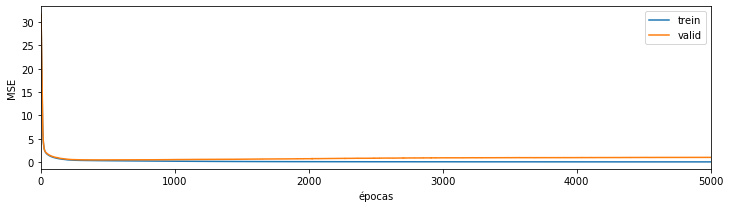

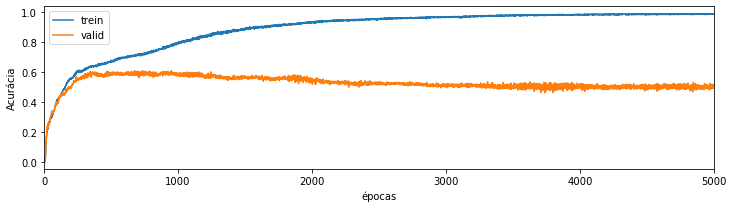

In [8]:
# avalia desempenho nos dados de treinamento e validação
tr_loss, tr_ac, tr_mse = rede.evaluate(X, Y)
val_loss, val_ac, val_mse = rede.evaluate(X_val, Y_val)

# mostra os dados de desempenho
print('Loss MSE: %.4f (train);  %.4f (val)'%(tr_loss, val_loss))
print('Acurácia: %.4f (train);  %.4f (val)'%(tr_ac, val_ac))

# Gráfico do MSE
plt.figure(figsize=(12,3))
plt.plot(treinamento.history['mse'])
plt.plot(treinamento.history['val_mse'])
plt.ylabel('MSE')
plt.xlabel('épocas')
plt.legend(('trein','valid'))
plt.xlim((0, EPOCAS))

# Gráfico de acurácia
plt.figure(figsize=(12,3))
plt.plot(treinamento.history['accuracy'])
plt.plot(treinamento.history['val_accuracy'])
plt.ylabel('Acurácia')
plt.xlabel('épocas')
plt.legend(('trein','valid'))
plt.xlim((0, EPOCAS));

___
## Avaliação nos dados de validação

O código abaixo compara a saída da rede nos dados de validação. Quanto mais próximo da reta melhor.

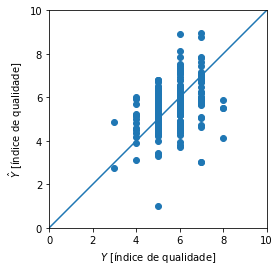

In [9]:
# FAZ A PREDIÇÃO NOS DADOS DE VALIDAÇÃO
Yh_val = rede.predict(X_val)

plt.axes(aspect='equal')
plt.scatter(Y_val, Yh_val)
plt.xlabel('$Y$ [índice de qualidade]')
plt.ylabel('$\hat{Y}$ [índice de qualidade]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims);

Abaixo temos o histograma dos erros cometidos.

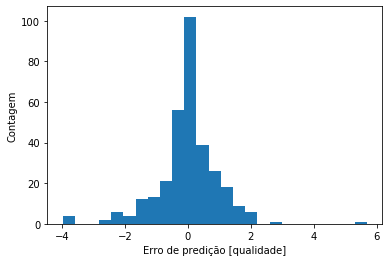

In [10]:
# Histograma dos erros
erros = Yh_val[:,0] - Y_val
plt.hist(erros, bins = 25)
plt.xlabel("Erro de predição [qualidade]")
plt.ylabel("Contagem");

___

# Conclusões

Escreva aqui, em linguagem `markdown`, suas considerações sobre o que foi aprendido nesse trabalho prático.

*### escreva aqui ###*